In [12]:
import numpy as np
import dill
import matplotlib.pyplot as plt
import matplotlib as mpl
import data_visualization as dv
from pathlib import Path
import pandas as pd    
import read_data_functions as rdf
import plot_functions as pf
from initializer import InitialThangs
import Statistics as st
import constants
import pingouin as pg
# import viper as vp
%load_ext autoreload
%autoreload 2
pd.set_option('display.max_columns', None)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
EXPERIMENT = "Exp2"
plt.style.use('C:/Users/Seth Sullivan/anaconda3/Lib/site-packages/matplotlib/mpl-data/stylelib/cashaback_light.mplstyle')
wheel = dv.ColorWheel()

# Get path and save path 
DATA_PATH = Path(rf"D:\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\results")
SAVE_PATH = Path(rf"D:\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\paper\figures")
it = InitialThangs(EXPERIMENT)

# Data and Stats

In [14]:
rawdata_df = pd.read_pickle(DATA_PATH / "participant_data" / "Exp2_reaction_time_df.pkl") 
data_df = pd.read_pickle(DATA_PATH / "participant_data" / "Exp2_stats_df.pkl") 
exp2_stats_df = pd.read_pickle(DATA_PATH / "participant_data" / "Exp2_stats_df.pkl") 
exp2_anova_df = pd.read_pickle(DATA_PATH / "participant_data" / "Exp2_anova_df.pkl") 
exp2_pvals_df = pd.read_pickle(DATA_PATH / "participant_data" / "Exp2_pvals_df.pkl") 
exp2_cles_df  = pd.read_pickle(DATA_PATH / "participant_data" / "Exp2_cles_df.pkl") 
#! Factor_1 is TRIAL TYPE: React or Guess
#! Factor_2 is CONDITION: Mixed or Only, see data_df if confused
exp2_anova_df

,Metric,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,Reaction_Time_Median,Factor_1,32255.197044,1,23,32255.197044,75.468032,1.013779e-08,1.013779e-08,0.165221,1.0
1,Reaction_Time_Median,Factor_2,86981.964858,1,23,86981.964858,83.039497,4.282971e-09,4.282971e-09,0.347996,1.0
2,Reaction_Time_Median,Factor_1 * Factor_2,52596.931009,1,23,52596.931009,147.694082,1.715832e-11,1.715832e-11,0.243994,1.0
0,Reaction_Time_SD,Factor_1,16231.169328,1,23,16231.169328,192.172428,1.179429e-12,1.179429e-12,0.491835,1.0
1,Reaction_Time_SD,Factor_2,6672.244492,1,23,6672.244492,47.195237,5.269584e-07,5.269584e-07,0.284624,1.0
2,Reaction_Time_SD,Factor_1 * Factor_2,284.540187,1,23,284.540187,1.734575,2.007995e-01,2.007995e-01,0.016684,1.0
0,Reaction_Time_IQR,Factor_1,26204.222777,1,23,26204.222777,102.939758,5.812179e-10,5.812179e-10,0.340454,1.0
1,Reaction_Time_IQR,Factor_2,21711.936945,1,23,21711.936945,49.317631,3.717562e-07,3.717562e-07,0.299574,1.0
2,Reaction_Time_IQR,Factor_1 * Factor_2,3803.447228,1,23,3803.447228,12.587426,1.715445e-03,1.715445e-03,0.069701,1.0


In [25]:
data_df

,Subject,Condition,Factor_1,Factor_2,Reaction_Time_Median,Reaction_Time_SD,Reaction_Time_IQR
0,1,1,React,Mixed,326.218536,33.611477,40.343369
1,1,2,Guess,Mixed,366.903442,64.895992,94.145905
2,1,3,React,Only,296.959229,18.933498,26.746613
3,1,4,Guess,Only,274.025757,38.617895,43.400269
4,2,1,React,Mixed,319.786163,53.684984,67.039749
...,...,...,...,...,...,...,...
91,23,4,Guess,Only,339.617035,72.820395,89.625565
92,24,1,React,Mixed,423.189148,59.148601,58.847839
93,24,2,Guess,Mixed,526.726227,47.918337,22.896103
94,24,3,React,Only,369.821320,27.611786,40.057007


# Plotting Constants

In [15]:
collapse_colors = [
    wheel.blend_colors(constants.xticklabel_colors_means[0],constants.xticklabel_colors_means[3]),
    wheel.blend_colors(constants.xticklabel_colors_means[1],constants.xticklabel_colors_means[4]),
    wheel.blend_colors(constants.xticklabel_colors_means[2],constants.xticklabel_colors_means[5])
]

# Figures

## Experimental Design

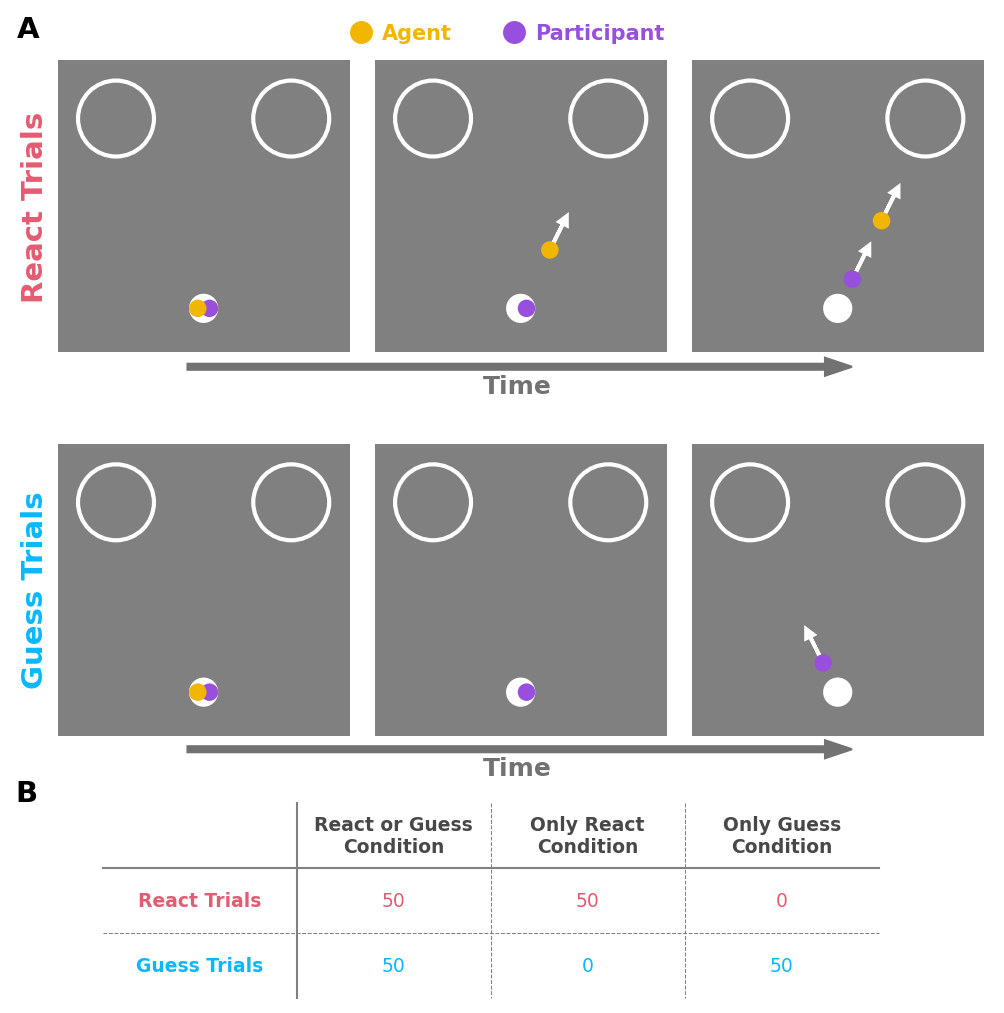

In [16]:
#* Create Shape Objects
squares = [(0,0,1,1)]*6
circle_radius = 0.13
circ_pad = 0.07
startx,starty = 0.5, 0.15
agent_circle_positions =[(startx-0.02,starty),
                         (startx+0.1,starty+0.2),
                         (startx+0.15,starty+0.3),
                         (startx-0.02,starty),
                         (0,0),
                         (0,0)]
player_circle_positions =  [(startx+0.02,starty),
                            (startx+0.02,starty),
                            (startx+0.05,starty+0.1),
                            (startx+0.02,starty),
                            (startx+0.02,starty),
                            (startx-0.05,starty+0.1)]
rectangles = []
circle_patches = []
start_circles = []
agent_circles = []
player_circles = []
for i,square in enumerate(squares):
    rectangles.append(mpl.patches.Rectangle((square[0], square[1]), square[2], square[3], edgecolor='grey', facecolor='grey', lw=0,clip_on=False))
    circLx = square[0] + circle_radius + circ_pad
    circRx = square[0] + square[2] - circle_radius - circ_pad
    circy = square[1] + square[3] - circle_radius - circ_pad
    circL = mpl.patches.Circle((circLx,circy), circle_radius, edgecolor='white', facecolor='none', lw=2)
    circR = mpl.patches.Circle((circRx,circy), circle_radius, edgecolor='white', facecolor='none', lw=2)
    circle_patches.append((circL,circR))
    start_circles.append(mpl.patches.Circle((startx,starty), 0.05, edgecolor='white', facecolor='white', lw=0))
    agent_circles.append(mpl.patches.Circle(agent_circle_positions[i], 0.03, facecolor=constants.agent_color, lw=0))
    player_circles.append(mpl.patches.Circle(player_circle_positions[i], 0.03, facecolor=constants.player_color, lw=0))
    
#* Initialize Plot
mosaic = [["a","aa","aaa"],
          ["b","bb","bbb"],
          ["c","c","c"],
]
fig = pf.NewFigure(mosaic, figsize=(6.5,6.5), height_ratios=[1,1,0.525])
square_axes = [ax for k,ax in fig.axes.items() if k !='c' ]
#* Plot upper and lower squares and associated circles
for i,ax in enumerate(square_axes):
    ax.set_aspect('equal')
    ax.add_patch(rectangles[i])
    ax.add_patch(circle_patches[i][0])
    ax.add_patch(circle_patches[i][1])
    ax.add_patch(start_circles[i])
    if i == 1:
        ax.arrow(agent_circle_positions[i][0],agent_circle_positions[i][1],0.045,0.09, lw=1.8,head_width=0.03,head_length=0.03, color=wheel.white)
    elif i == 2:
        ax.arrow(player_circle_positions[i][0],player_circle_positions[i][1],0.045,0.09,lw=1.8,head_width=0.03,head_length=0.03, color=wheel.white)
        ax.arrow(agent_circle_positions[i][0],agent_circle_positions[i][1],0.045,0.09, lw=1.8,head_width=0.03,head_length=0.03, color=wheel.white)
    elif i == 5:
        ax.arrow(player_circle_positions[i][0],player_circle_positions[i][1],-0.045,0.09,lw=1.8,head_width=0.03,head_length=0.03, color=wheel.white)
    
    ax.add_patch(player_circles[i])
    ax.add_patch(agent_circles[i]) if i not in [4,5] else None
        
    ax.set_xlim(0,1) # need to do this because ax arrow fucks with the xlim and ylim
    ax.set_ylim(0,1)
    ax.xaxis.set_tick_params(labelbottom=False)
    ax.set_xticks([])
    ax.yaxis.set_tick_params(labelbottom=False)
    ax.set_yticks([])
    ax.spines[['left', 'bottom']].set_visible(False)  

fig.axes['a'].set_ylabel("React Trials", fontsize=14,fontweight="bold", color=wheel.rak_red)
fig.axes['b'].set_ylabel("Guess Trials", fontsize=14,fontweight="bold", color=wheel.rak_blue)

#*### Plot Table ######
# Old table
if False:
    fig.axes['c'].set_xticklabels([])
    fig.axes['c'].set_yticklabels([])
    table = np.array([
        ["Condition","React\nTrials","Guess\nTrials"],
        ["React or\n Guess", "50", "50"],
        ["React", "50", "0"],
        ["Guess", "0", "50"],
    ])
    fontcolors = np.full_like(table, wheel.black)
    fontcolors[1:,0] = wheel.black
    fontcolors[1,1] = wheel.rak_red
    fontcolors[2,1] = wheel.dark_red
    fontcolors[1,2] = wheel.rak_blue
    fontcolors[3,2] = wheel.dark_blue

    fontweights = np.full_like(table, "bold")
    fontweights[1:,0] = "light"

    inner_horizontal_ls = ["-","--","--"]
    inner_vertical_ls = ["--","--","--"]


    pf.PrettyTable(fig.axes['c'], table_values=table, fontcolor=fontcolors, fontweight=fontweights,
                inner_horizontal_ls=inner_horizontal_ls,inner_vertical_ls=inner_vertical_ls, 
                inner_lw = 0.5, border_lw=2, fontsize=8, ha='center')
# New Explicit Table
if True:
    fig.axes['c'].set_xticklabels([])
    fig.axes['c'].set_yticklabels([])
    table = np.array([
        ["","React Trials","Guess Trials"],
        ["React or Guess\nCondition", "50", "50"],
        ["Only React\nCondition", "50", "0"],
        ["Only Guess\nCondition", "0", "50"],
    ]).T
    fontcolors = np.full_like(table, wheel.dark_grey)
    # fontcolors[0,1] = wheel.blend_colors(wheel.rak_red, wheel.dark_red)
    # fontcolors[0,2] = wheel.blend_colors(wheel.rak_blue, wheel.dark_blue)
    fontcolors[0,:] = wheel.lighten_color(wheel.dark_grey, 1.3) 
    fontcolors[1,:] = wheel.rak_red
    fontcolors[2,:] = wheel.rak_blue

    fontweights = np.full_like(table, "bold")
    fontweights[1:,1:] = "light"

    inner_horizontal_ls = ["-","--","--"]
    inner_vertical_ls = ["-","--","--"]
    inner_horizontal_lw = [1,0.5,0.5]
    inner_vertical_lw = [1,0.5,0.5]

    pf.PrettyTable(fig.axes['c'], table_values=table, fontcolor=fontcolors, fontweight=fontweights,
                inner_horizontal_ls=inner_horizontal_ls,inner_vertical_ls=inner_vertical_ls, 
                inner_horizontal_lw = inner_horizontal_lw, inner_vertical_lw=inner_vertical_lw, 
                border_lw=0, fontsize=9, ha='center', 
                bold_first_row=True)
fig.axes['c'].set_axis_off()

#*####### Fine tuning and add time arrows ########
# fig.fig.canvas.draw()
# fig.fig.set_layout_engine('none')
if False:
    adj = 2
    fig.adjust_size(fig.axes['c'],(0,-adj))
    fig.adjust_position(fig.axes['c'],(0,adj/2))

    fig.adjust_position(fig.axes['a'], (0.1,0))
    fig.adjust_position(fig.axes['aa'], (0.1,0))
    fig.adjust_position(fig.axes['b'], (0.1,0))
    
fig.adjust_size(fig.axes['c'], (-1,0))
fig.adjust_position(fig.axes['c'], (0.3 ,-0.1))

#* Plot Time Arrows
for ypos in [4.15,1.6]:
    fig.axmain.text(3.35, ypos-0.13, "Time", ha='center',va='center', 
                    transform=fig.axmain.transData, fontweight="bold", color=wheel.dark_grey)
    fig.axmain.arrow(1.15, ypos, 4.25, 0, transform = fig.axmain.transData, color=wheel.dark_grey, width=0.04)

#* Legend
dv.legend(ax=fig.axmain, labels=["Agent", "Participant"], 
        colors=[constants.agent_color, constants.player_color ],
        handlestyle="circle", fontsize=10, loc="center", bbox_to_anchor=(0.5,0.98),
        markersize=10, handletextpad=0, columnspacing=2,
        ncol=2)
fig.add_letter(fig.axmain,0.0015,0.999,transform=fig.axmain.transAxes, fontsize=14)
fig.add_letter(fig.axmain,0.0015,1.4,transform=fig.axmain.transData, fontsize=14)
# fig.remove_figure_borders()
fig.savefig(SAVE_PATH / "exp2_design.png")
plt.show()

## Median Reaction Time

In [17]:
exp2_pvals_df

,Metric,Collapsed,01,02,13,23
0,Reaction_Time_Median,NaN,0.0,0.022598,0.0,0.036986
1,Reaction_Time_SD,react_guess,0.0,NaN,NaN,NaN
2,Reaction_Time_IQR,NaN,0.0,0.000006,0.0,0.000000


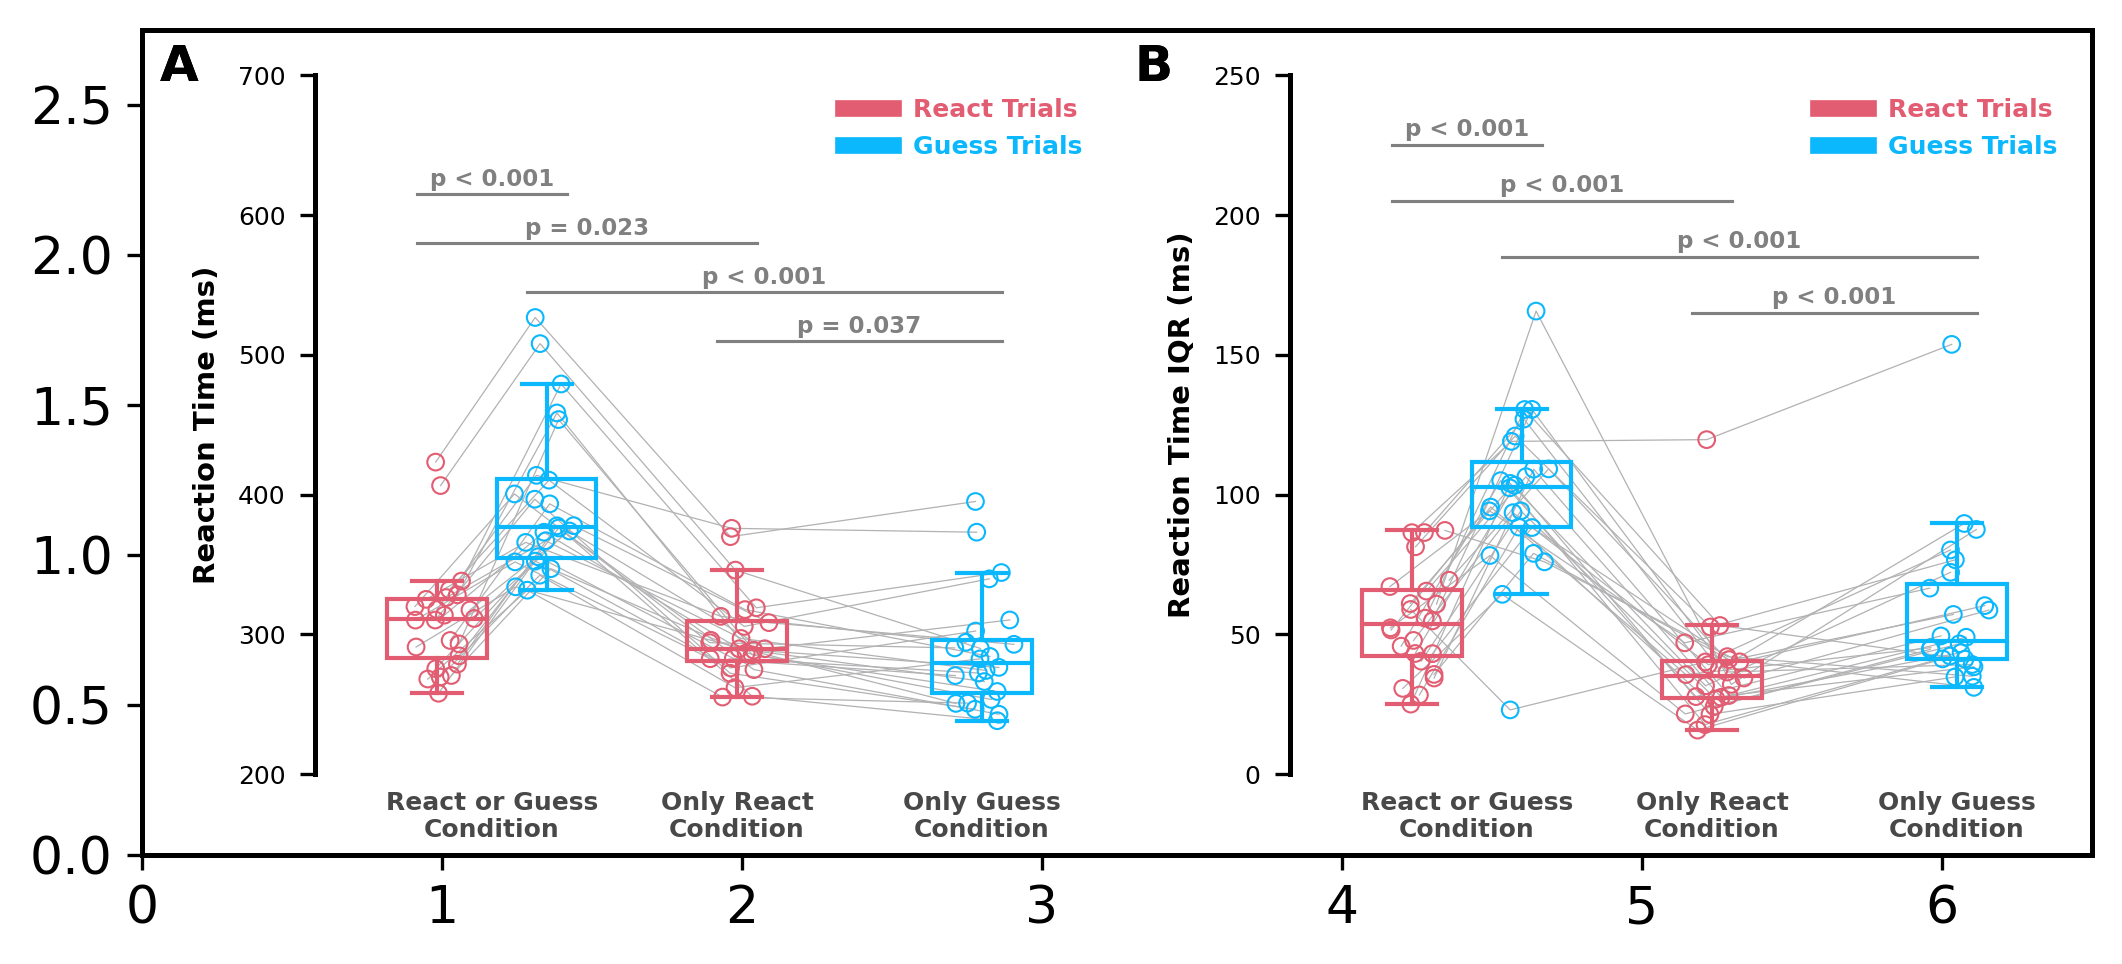

In [23]:
metric_names = ['Reaction_Time_Median',"Reaction_Time_IQR"]
legend_fontsize = 6
ticklabel_fontsize = 6
axeslabel_fontsize = 7

xlabs = ['React or Guess\nCondition',
         'Only React\nCondition',
         'Only Guess\nCondition']
colors = [wheel.rak_red, wheel.rak_blue, 
          wheel.rak_red, wheel.rak_blue]
combos = ['01','02','13','23',]

ylims = [(200,700), (0,250)]
xlocs = np.arange(0,3,1)
ylocs = [np.arange(200,max(ylims[0])+1,100),
         np.arange(0,max(ylims[1])+1,50)]
ylabels = ["Reaction Time (ms)", 
           "Reaction Time IQR (ms)"
           ]
w,h = 6.5,2.75
fig = pf.NewFigure("ab",figsize = (w,h), dpi = 300)
bw = (0.25*w)/4 # box widths of all boxes combined takes up 30% of the width
box_lw = 1
ax1,ax2 = fig.axes['a'], fig.axes['b']
statline_y = [615, 225]
shift = np.array([[-35,-35,-35,-35],[-20]*4])
h=[2.5,1.5]

for i,ax in enumerate([ax1,ax2]):
    np.random.seed(17)

    metric_name = metric_names[i]
    metric = st.df_to_array(data_df[metric_name],
                        it.num_subjects, it.num_blocks) 
    pvals = exp2_pvals_df.query("Metric == @metric_name").iloc[0]
    cles = exp2_cles_df.query("Metric == @metric_name").iloc[0]
    dv.boxplot(metric[:,0],
                x_pos = xlocs[0] - 0.55*bw ,
                ax=ax,box_width = bw,
                box_lw=box_lw, linewidth=box_lw, 
                whisker_lw=box_lw, color = colors[0])
    dv.boxplot(metric[:,1],
                x_pos = xlocs[0] + 0.55*bw ,
                ax=ax,box_width = bw,
                box_lw=box_lw, linewidth=box_lw, 
                whisker_lw=box_lw, color = colors[1])
            
    dv.boxplot(metric[:,2],
            x_pos = xlocs[1],
            ax=ax,box_width = bw,
            box_lw=box_lw, linewidth=box_lw, 
            whisker_lw=box_lw, color = colors[2]) 
    dv.boxplot(metric[:,3],
                x_pos = xlocs[2],
                ax=ax,box_width = bw,
                box_lw=box_lw, linewidth=box_lw, 
                whisker_lw=box_lw, color = colors[3])
            
        
    dv.jitter_array(ax =ax, 
                    x_positions = [xlocs[0]-0.5*bw,xlocs[0]+0.5*bw,xlocs[1],xlocs[2]],
                    data = metric.T,
                    circle_size = 16,
                    include_mean=False,
                    data_color = colors, 
                    data_edge_color = wheel.light_grey, 
                    circle_lw=0.5, 
                    noise_scale=0.06,
                    alpha=0.2)
    
    dv.legend(ax, labels=["React Trials", "Guess Trials"], colors=[wheel.rak_red, wheel.rak_blue], fontsize=6)
    stat_xlocs = [xlocs[0]-0.55*bw, xlocs[0]+0.55*bw, xlocs[1],xlocs[2]]
    for j,c in enumerate(combos):
        a = int(c[0])
        b = int(c[1])
        dv.stat_annotation(ax, stat_xlocs[a] - bw/5, stat_xlocs[b] + bw/5,
                            statline_y[i],
                            p_val=pvals[c],
                            cles=None,
                            fontsize=5.5,
                            h=h[i], 
                            lw=0.75, 
                            stacked=True)
        statline_y[i] += shift[i,j]

    # [ticklabel.set_color(color) for (color,ticklabel) in zip(colors,ax.xaxis.get_ticklabels())]
    [ticklabel.set_fontweight("bold") for ticklabel in ax.xaxis.get_ticklabels()]
    ax.set_xticks(xlocs, labels = xlabs)
    ax.set_yticks(ylocs[i])
    ax.set_yticklabels(ylocs[i], fontsize=ticklabel_fontsize)
    ax.set_xticklabels(xlabs, fontsize=ticklabel_fontsize,color=wheel.lighten_color(wheel.dark_grey, 1.3) )
    ax.tick_params(axis='x', which='major', pad=0.5)
    ax.set_ylabel(ylabels[i], 
                  fontsize=axeslabel_fontsize)
    ax.set_ylim(ylims[i])
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(bottom=False) 
    fig.add_all_letters(va='top', verticalshift=0.1, horizontalshift=-0.45)

plt.show()
fig.savefig(SAVE_PATH / "exp2_reaction_panel.png")

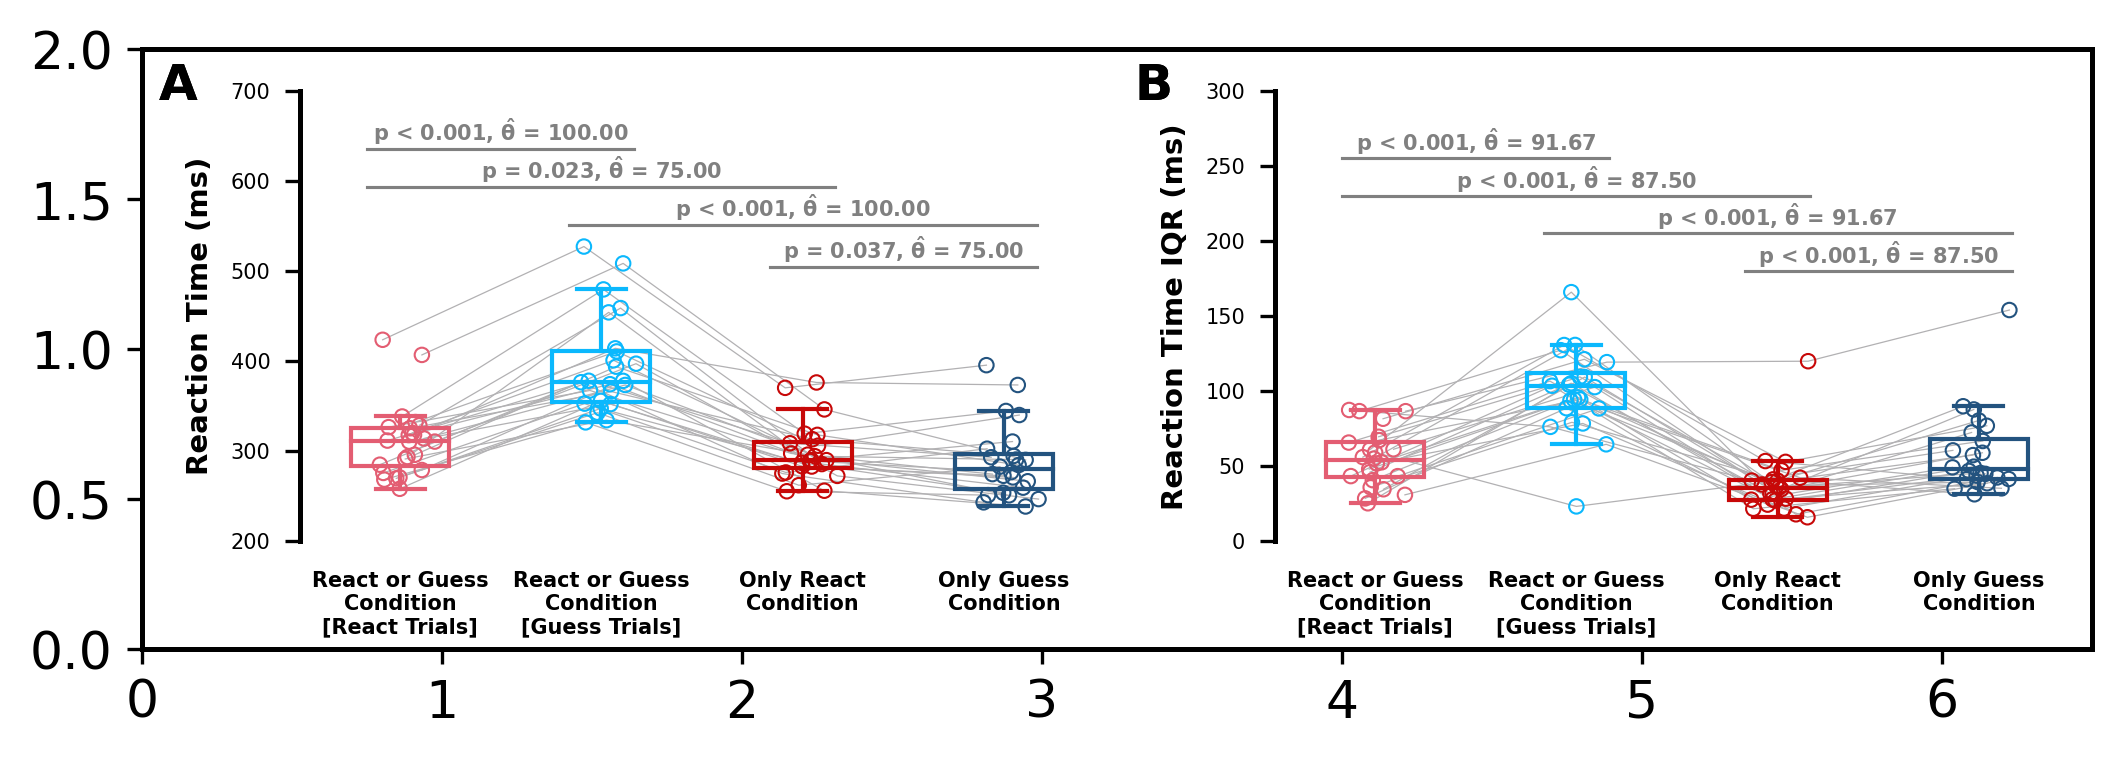

In [ ]:
metric_names = ['Reaction_Time_Median',"Reaction_Time_IQR"]
legend_fontsize = 5
ticklabel_fontsize = 5
axeslabel_fontsize = 7

xlabs = ['React or Guess\nCondition\n[React Trials]','React or Guess\nCondition\n[Guess Trials]',
         'Only React\nCondition','Only Guess\nCondition']
colors = [wheel.rak_red, wheel.rak_blue, 
          wheel.dark_red, wheel.dark_blue]
combos = ['01','02','13','23',]

ylims = [(200,700), (0,300)]
xlocs = np.arange(0,4,1)
ylocs = [np.arange(200,max(ylims[0])+1,100),
         np.arange(0,max(ylims[1])+1,50)]
ylabels = ["Reaction Time (ms)", 
           "Reaction Time IQR (ms)"
           ]
w,h = 6.5,2
fig = pf.NewFigure("ab",figsize = (w,h), dpi = 300)
bw = (0.3*w)/4 # box widths of all boxes combined takes up 30% of the width
box_lw = 1
ax1,ax2 = fig.axes['a'], fig.axes['b']
statline_y = [635,255]
shift = np.array([[-42,-42,-47,-42],[-25]*4])
h=[3,1]
np.random.seed(13)
for i,ax in enumerate([ax1,ax2]):
    metric_name = metric_names[i]
    metric = st.df_to_array(data_df[metric_name],
                        it.num_subjects, it.num_blocks) 
    pvals = exp2_pvals_df.query("Metric == @metric_name").iloc[0]
    cles = exp2_cles_df.query("Metric == @metric_name").iloc[0]
    for j in range(4):
        dv.boxplot(metric[:,j],
                   x_pos = xlocs[j],
                   ax=ax,box_width = bw,
                   box_lw=box_lw, linewidth=box_lw, 
                   whisker_lw=box_lw, color = colors[j])
        
        
    for j,c in enumerate(combos):
        a = int(c[0])
        b = int(c[1])
        dv.stat_annotation(ax, xlocs[a]-bw/3, xlocs[b]+bw/3,
                            statline_y[i],
                            p_val=pvals[c],
                            cles=cles[c],
                            fontsize=legend_fontsize,
                            h=h[i], 
                            lw=0.75)
        statline_y[i] += shift[i,j]
    dv.jitter_array(ax =ax, 
                    x_positions = xlocs,
                    data = metric.T,
                    circle_size = 12,
                    include_mean=False,
                    data_color = colors, 
                    data_edge_color = wheel.light_grey, 
                    circle_lw=0.5, 
                    noise_scale=0.08)
    # [ticklabel.set_color(color) for (color,ticklabel) in zip(colors,ax.xaxis.get_ticklabels())]
    [ticklabel.set_fontweight("bold") for ticklabel in ax.xaxis.get_ticklabels()]
    ax.set_xticks(xlocs, labels = xlabs)
    ax.set_yticks(ylocs[i])
    ax.set_yticklabels(ylocs[i], fontsize=ticklabel_fontsize)
    ax.set_xticklabels(xlabs, fontsize=ticklabel_fontsize)
    ax.set_ylabel(ylabels[i], 
                  fontsize=axeslabel_fontsize)
    ax.set_ylim(ylims[i])
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(bottom=False) 
    fig.add_all_letters(va='top', verticalshift=0.1, horizontalshift=-0.4)
    
plt.show()
fig.savefig(SAVE_PATH / "exp2_reaction_panel.png")

# Supplementary Figures (?)

## Reaction Time Distributions

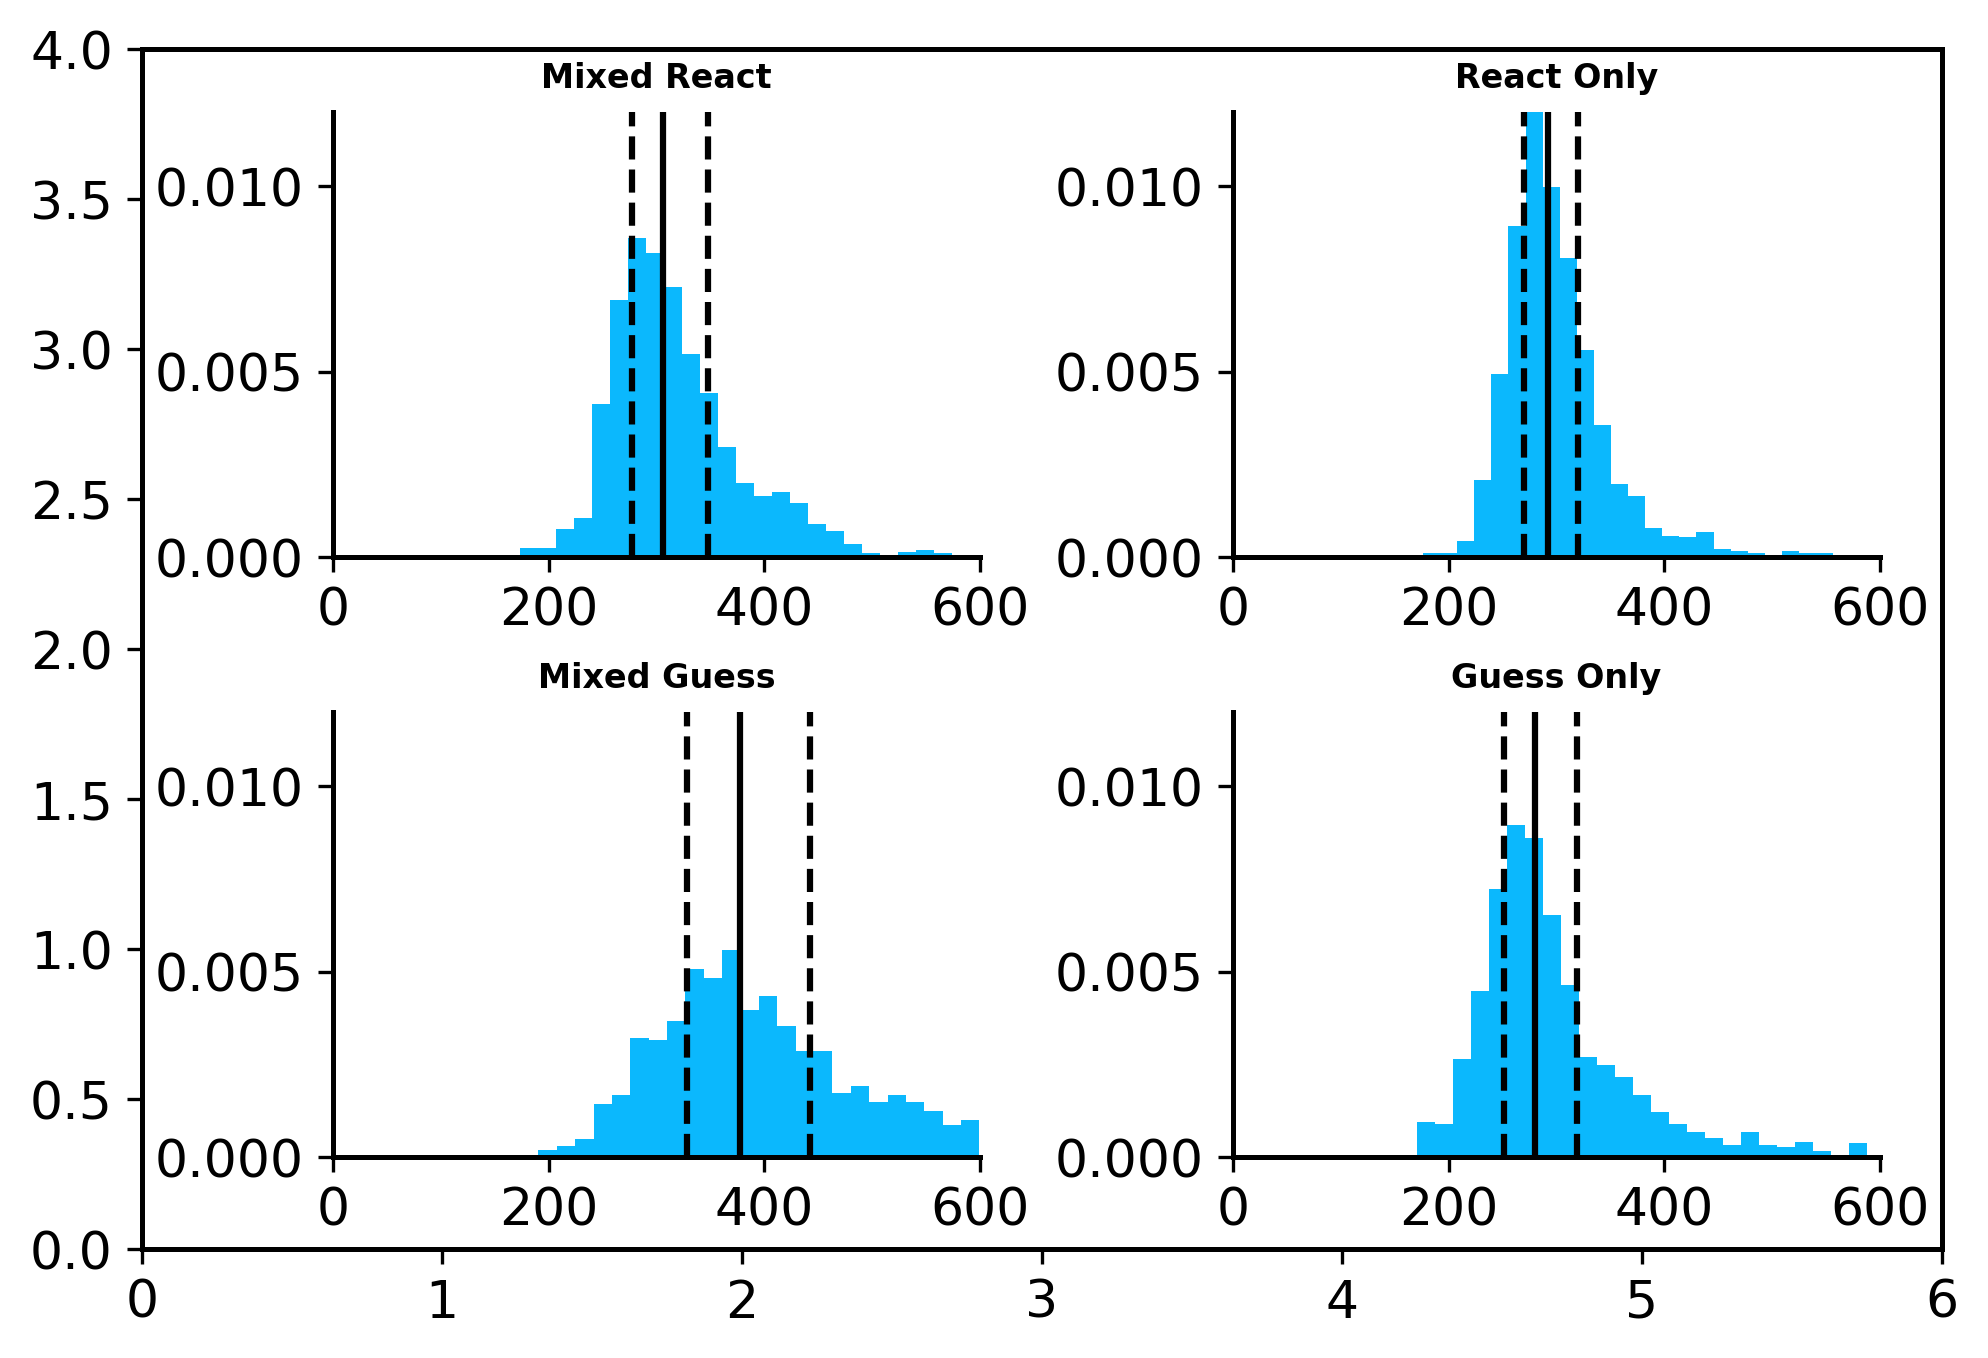

In [ ]:
fig = pf.NewFigure("ab;cd",figsize = (6,4), dpi = 300)
ax1,ax2,ax3,ax4 = fig.axes.values()
filters = [["mixed","react"],
           ["react_only","react"],
           ['mixed',"guess"],
           ['guess_only','guess']]
titles = ["Mixed React", "React Only", "Mixed Guess", "Guess Only"]
for i,ax in enumerate(fig.axes.values()):
    condition = filters[i][0]
    decision_type = filters[i][1]
    values = rawdata_df.query('condition == @condition & decision_type == @decision_type')['reaction_time'].to_numpy()
    ax.hist(values, density=True,bins=25)
    ax.axvline(np.nanmedian(values))
    ax.axvline(np.nanquantile(values,0.25),ls='--')
    ax.axvline(np.nanquantile(values,0.75),ls='--')
    ax.set_xlim(0,600)
    ax.set_ylim(0,0.012)
    ax.set_title(titles[i], fontsize = 8)
    

## Task Switching

In [ ]:
# Get the reactions that only came after a reaction
repeat_df = pd.DataFrame(columns=rawdata_df.columns)
switch_df = pd.DataFrame(columns=rawdata_df.columns)
c1,c2 = 0,0
for index,row in rawdata_df.query("condition == 'mixed'").iterrows():
    if index == 0:
        pass
    else:
        if last_row['decision_type'] == row['decision_type']:
            repeat_df.loc[c1] = row
            c1+=1
        else:
            switch_df.loc[c2] = row
            c2+=1
    last_row = row['decision_type']

TypeError: string indices must be integers

In [ ]:
def get_metric(df:pd.DataFrame, metric:str, groupby:list,  condition:str, decision_type:str) -> np.ndarray:
        specific_condition = df.query(f"condition=='mixed' & decision_type==@decision_type").reset_index()
        groupby_median = specific_condition.groupby(groupby)[[metric]].median()
        return groupby_median.values.squeeze().astype(float)

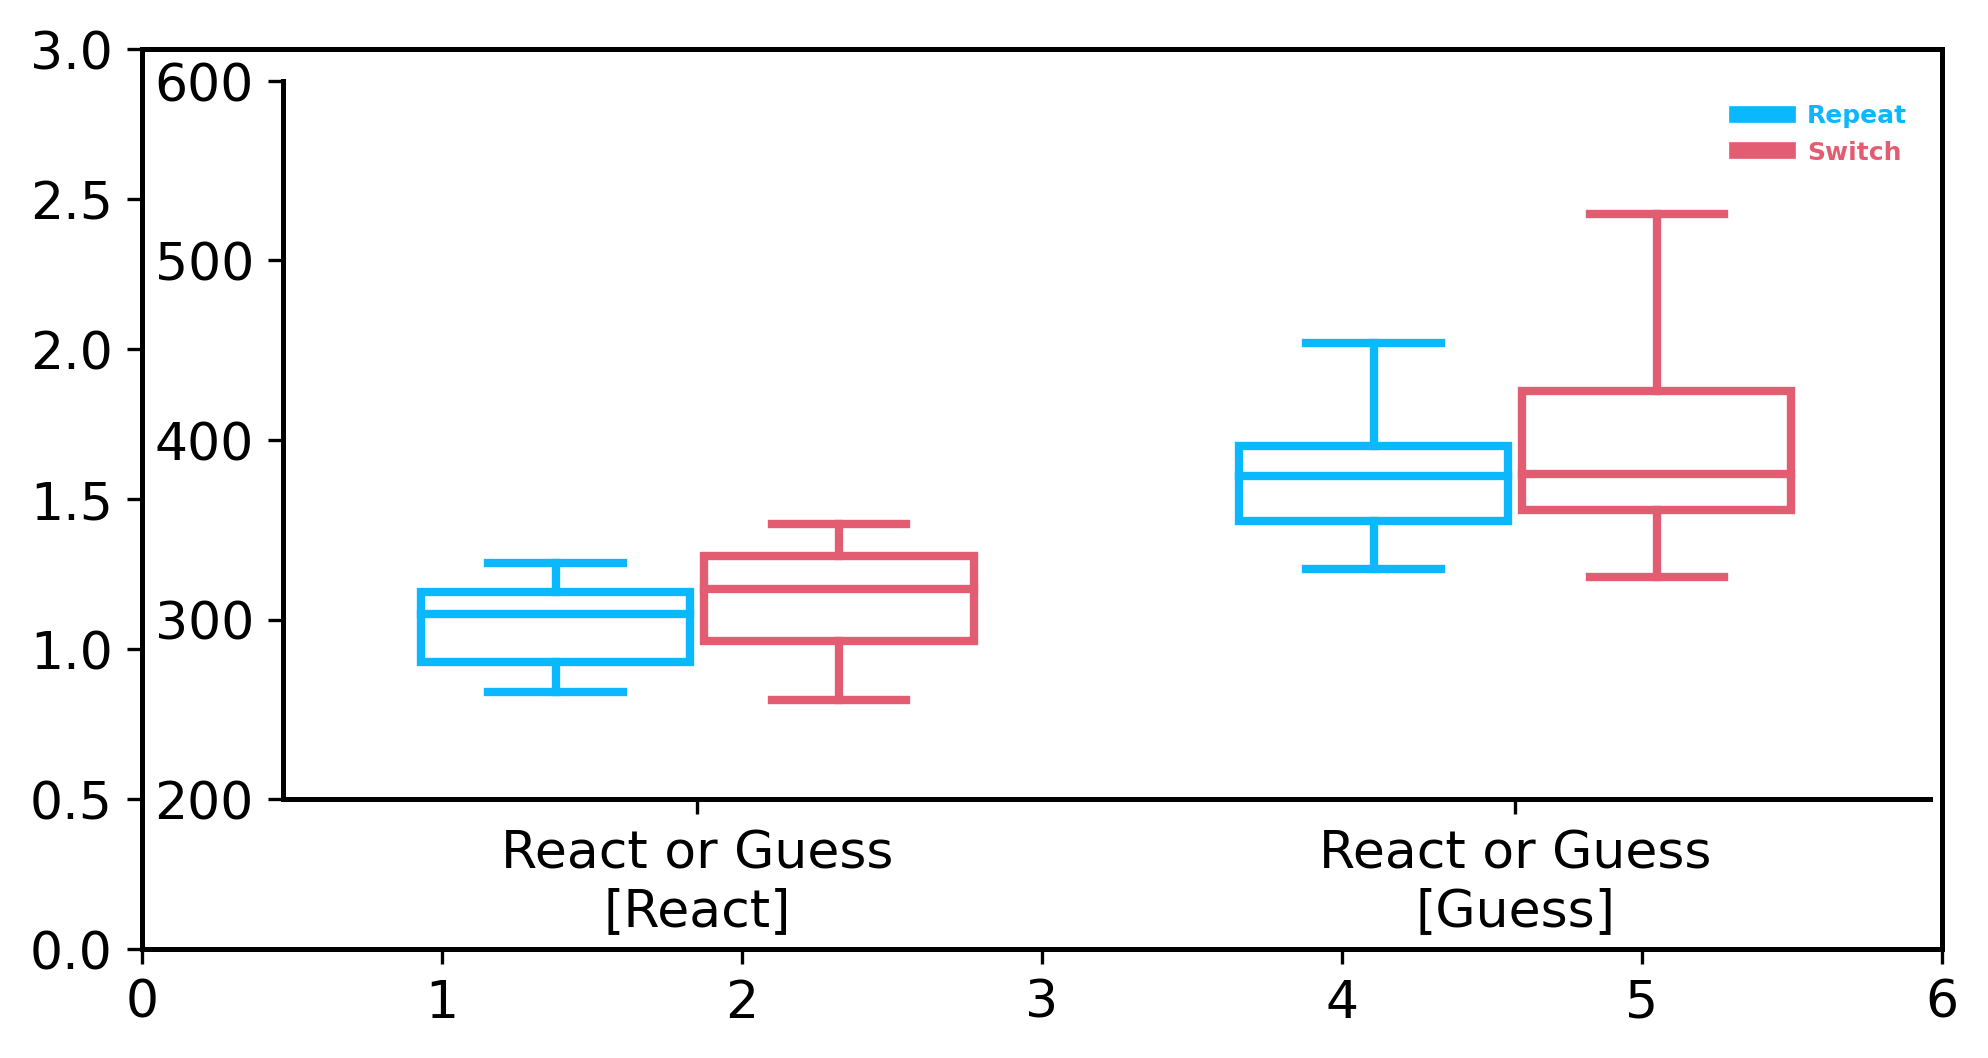

In [ ]:
metrics = [get_metric(repeat_df,metric='reaction_time',groupby=['subject'], condition='mixed',decision_type = 'react'),
           get_metric(switch_df,metric='reaction_time',groupby=['subject'], condition='mixed',decision_type = 'react'),
           get_metric(repeat_df,metric='reaction_time',groupby=['subject'], condition='mixed',decision_type = 'guess'),
           get_metric(switch_df,metric='reaction_time',groupby=['subject'], condition='mixed',decision_type = 'guess'),
]       
fig = pf.NewFigure('a',figsize=(6,3),dpi=300,)
ax = fig.axes['a']
bw = (0.1*w)/2 # box widths of all boxes combined takes up 30% of the width
xlocs = np.linspace(0,1.5,2)
pf.boxplot(ax, xlocs[0]-bw/2, data=metrics[0], box_width=bw*0.95, lw=2, color = wheel.rak_blue)
pf.boxplot(ax, xlocs[0]+bw/2, data=metrics[1], box_width=bw*0.95,lw=2, color = wheel.rak_red)
pf.boxplot(ax, xlocs[1]-bw/2, data=metrics[2], box_width=bw*0.95,lw=2, color = wheel.rak_blue)
pf.boxplot(ax, xlocs[1]+bw/2, data=metrics[3], box_width=bw*0.95,lw=2, color = wheel.rak_red)
        
ax.set_xticks(xlocs, labels = ["React or Guess\n[React]","React or Guess\n[Guess]"])
ax.set_ylim(200,600)
dv.legend(ax, labels = ['Repeat',"Switch"], colors = [wheel.rak_blue, wheel.rak_red])

In [ ]:
rawdata_df.query("subject == 1")['decision_type'].to_numpy()[:100]

array(['guess', 'react', 'guess', 'guess', 'guess', 'react', 'guess',
       'guess', 'react', 'react', 'guess', 'guess', 'react', 'guess',
       'react', 'react', 'guess', 'react', 'react', 'react', 'react',
       'react', 'guess', 'react', 'guess', 'react', 'guess', 'react',
       'react', 'react', 'react', 'react', 'react', 'guess', 'guess',
       'react', 'guess', 'react', 'guess', 'react', 'react', 'react',
       'react', 'react', 'react', 'react', 'guess', 'guess', 'react',
       'guess', 'guess', 'guess', 'guess', 'guess', 'react', 'guess',
       'react', 'guess', 'react', 'guess', 'react', 'react', 'react',
       'react', 'guess', 'guess', 'react', 'guess', 'guess', 'guess',
       'guess', 'guess', 'react', 'guess', 'guess', 'guess', 'react',
       'guess', 'guess', 'guess', 'react', 'guess', 'react', 'react',
       'guess', 'react', 'guess', 'guess', 'guess', 'guess', 'guess',
       'react', 'guess', 'react', 'react', 'react', 'react', 'guess',
       'react', 'gue